In [16]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 

In [21]:
# import io
# import sharepy
# import pandas as pd

# URL = 'https://unimelbcloud.sharepoint.com/teams/GRDCWheatYieldPhysiology'
# SHAREPOINT_USER = 'Hamish.Brown@plantandfood.co.nz'
# SHAREPOINT_PASSWORD = 'ZORr%zJ4WAT2&KHc'
# FILE_URL = '/Shared%20Documents/General/Experiments/UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx'

# s = sharepy.connect(URL, username=SHAREPOINT_USER, password=SHAREPOINT_PASSWORD)
# r = s.get(URL+FILE_URL)
# f = io.BytesIO(r.content)
# df = pd.read_csv(f)

In [17]:
from office365.runtime.auth.authentication_context import AuthenticationContext
# from office365.sharepoint.client_context import ClientContext
# from office365.sharepoint.files.file import File 

# ####inputs########
# # This will be the URL that points to your sharepoint site. 
# # Make sure you change only the parts of the link that start with "Your"
# url_shrpt = 'https://unimelbcloud.sharepoint.com/teams/GRDCWheatYieldPhysiology'
# username_shrpt = 'Hamish.Brown@plantandfood.co.nz'
# password_shrpt = 'ZORr%zJ4WAT2&KHc'
# folder_url_shrpt = '/Shared%20Documents/General/Experiments/'
# fileName = 'UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx'
# #######################

# ctx_auth = AuthenticationContext(url_shrpt)
# ctx_auth.acquire_token_for_user(username_shrpt, password_shrpt)   
# ctx = ClientContext(url_shrpt, ctx_auth)
# response = File.open_binary(ctx, folder_url_shrpt+fileName)
# with open("./User Guide.docx", "wb") as local_file:
#     local_file.write(response.content)

In [42]:
HaunStageData = pd.read_excel('UOM2312-001RTX 24 DOO JH WWHI WHT.xlsx',
              sheet_name='Haun stage', usecols="D,L,P")
HaunStageData.columns = ['Cultivar','Clock.Today','Wheat.Phenology.HaunStage']
HaunStageData.loc[:,'SimulationName'] = ['Dookie2024Cv'+HaunStageData.loc[x,'Cultivar'] for x in HaunStageData.index]
HaunStageData.set_index(['SimulationName','Clock.Today'],inplace=True)
HaunStageData.drop('Cultivar',axis=1,inplace=True)
HaunStageData.sort_index(inplace=True)
HaunStageData.dropna(inplace=True)

In [47]:
SimulationNames = HaunStageData.index.get_level_values(0).drop_duplicates()

In [54]:
HaunStageData.groupby(['SimulationName','Clock.Today']).mean()

Wheat.Phenology.HaunStage
SimulationName          Clock.Today                           
Dookie2024CvEGA_Gregory 2024-06-24                    3.016667
                        2024-07-04                    3.841667
                        2024-07-15                    4.866667
                        2024-07-26                    5.958333
                        2024-08-09                    6.983333
...                                                        ...
Dookie2024CvYitpi       2024-07-26                    5.941667
                        2024-08-09                    6.891667
                        2024-08-19                    7.875000
                        2024-08-31                    9.075000
                        2024-09-14                    9.916667

[148 rows x 1 columns]

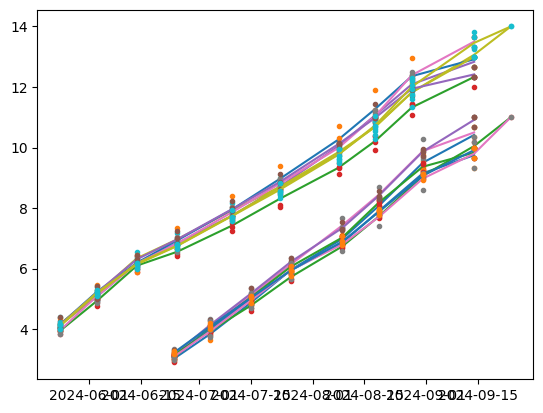

In [57]:
for s in SimulationNames:
    plt.plot(HaunStageData.groupby(['SimulationName','Clock.Today']).mean().loc[s,:],'-')
    plt.plot(HaunStageData.loc[s,:],'o',ms=3)

In [52]:
HaunStageData.loc[s,:]

,Wheat.Phenology.HaunStage
Clock.Today,
2024-06-24,3.266667
2024-06-24,3.200000
2024-06-24,3.233333
2024-06-24,3.166667
2024-07-04,4.200000
2024-07-04,4.100000
2024-07-04,4.066667
2024-07-04,4.000000
2024-07-15,5.100000
